# Pymaceuticals Inc.
---

### Analysis

The gender of mice was kept very close to 50/50 and gave a fair sample size to both.

The drugs with the highest average tumor volume were Ketapril, Naftisol, and Stelasyn, while the drugs with the lowest average tumor volume were Capomulin, Ramicane, and Propriva. 

The drugs with the highest variance rates for the tumor voluem were Ketapril, Naftisol, and Placebo, while the lowest variance rates were Ramicane, Capomulin, and Ceftamin. 

The drugs with the highest standard deviation were Ketapril, Naftisol, and Placebo, while the lowest standard deviation rates were with Capomulin, Ramicane, and Ceftamin. 

There is a correlation with Capomulin and Ramicane both being on the lower spectrum of the standard deviation & lower tumor volumes, and a similar correlation with Ketapril, Naftisol, and Placebo being on the higher spectrum of the standard deviation and higher tumor volumes.

As demonstrated with the scatter plot below with the Capomulin example, the weight of the mouse did impact the size of the tumor, which could be compared across all drug regimens to see if the correlation of higher weight to higher tumor size remained a constant trend. 

 

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [235]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [236]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#looking for duplicates that repeat in both the Mouse ID and Timepoint columns. Searched for how to locate duplicate information in 
# a row and found the duplicated function. 

duplicateRows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows



#array(['g989'], dtype=object)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [247]:
# Optional: Get all the data for the duplicate mouse ID. 

#I want to use the combined_df dataframe to only display the g989 rows. 

show_rows = combined_df[combined_df["Mouse ID"] == "g989"]
show_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [248]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# I want to remove all rows where g989 is in the mouse id column, and re-organize the order of the columns to match the example.


clean_df = combined_df[combined_df['Mouse ID'] != "g989"]

new_df = clean_df.iloc[:, [0,5,6,7,1,2,3,4]]

new_df.sort_values(by=['Tumor Volume (mm3)'])

new_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [249]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = new_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# I need to get the mean, median, variance, stand. deviation and SEM for the Tumor Volume (mm3) column and group by the 
# Drug Regimen column, only showing the stats for each specific drug listed in the column. 

mean_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_df = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean_df,
                          "Median Tumor Volume":median_df, 
                          "Tumor Volume Variance":variance_df, 
                          "Tumor Volume Std. Dev.":std_df, 
                          "Tumor Volume std. Err.":sem_df})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [251]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# separate the .groupby for the Drug Regimen from the .agg for the Tumor Volumne, then create a dictionary and a list within the 
# dictionary to specify the statistical analysis desired for each column.

agg_df = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

print(agg_df)


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

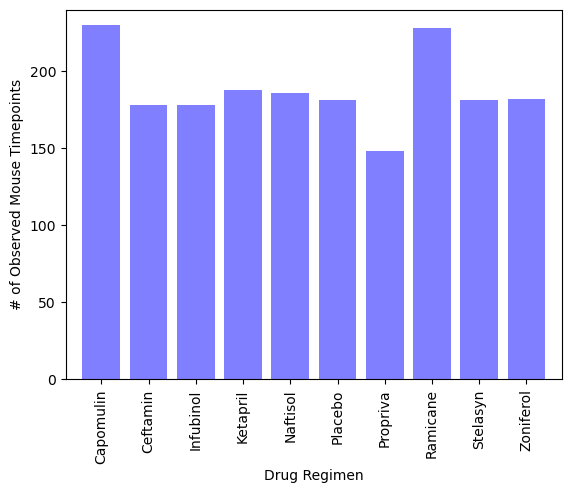

<Figure size 640x480 with 0 Axes>

In [252]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# determine the variables in each row for the Mouse ID and Timepoint columns. Create an x-axis that represents each Mouse ID
# and a y-axis that represents the Timepoint count. 

# bar_df = new_df.groupby("Drug Regimen")["Timepoint"].count()
# bar_df

bar_df = {'Mouse ID': ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", 
                     "Stelasyn", "Zoniferol"], 'Values': [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]}

df = pd.DataFrame(bar_df)

plt.bar(x_axis, users, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

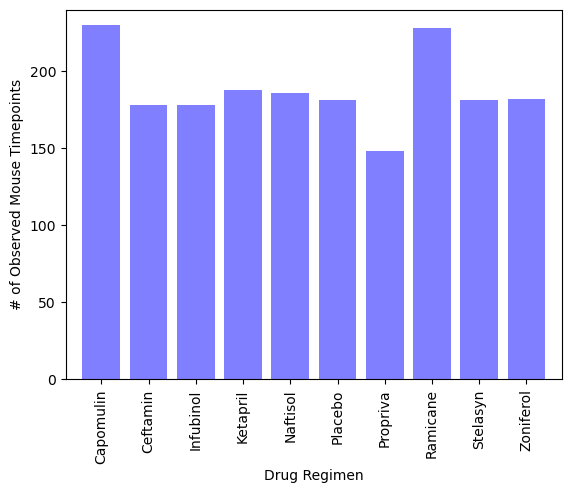

<Figure size 640x480 with 0 Axes>

In [253]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

users = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", 
                           "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

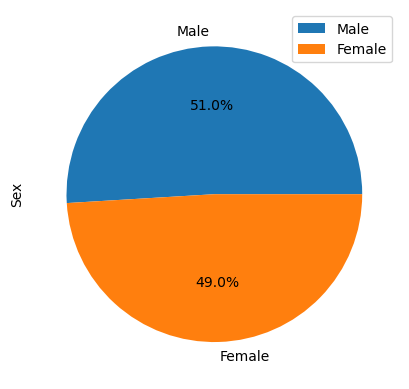

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# determine the counts between male and female mice in the Sex column, then plot in a pie chart.

# circle_df = new_df.groupby("Sex").count()
# circle_df

circle_chart = {'Sex':['Male', 'Female'], 'Count':[958, 922]}

df = pd.DataFrame(circle_chart)


colors = ["blue", "orange"]

df.plot(y='Count', kind='pie', labels=df['Sex'], autopct='%1.1f%%')


plt.ylabel("Sex")

plt.show()



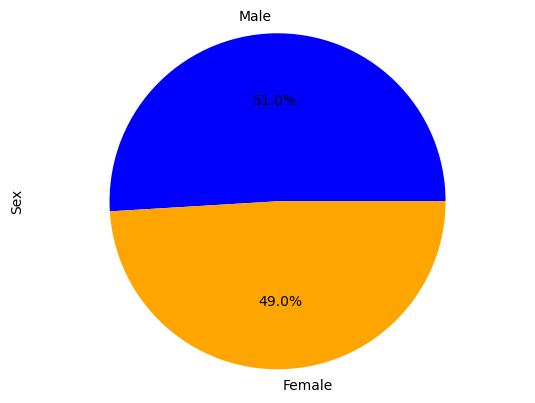

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Sex = ["Male", "Female"]

counts = [958, 922]

plt.pie(counts, labels=Sex, colors=colors,
        autopct="%1.1f%%", startangle=360)

plt.axis("equal")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [256]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_df = new_df.groupby('Mouse ID')["Timepoint"].max()             

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(new_df, greatest_df)
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,0,45.000000,0,Ramicane,Male,21,16
2,k403,0,45.000000,0,Ramicane,Male,21,16
3,k403,0,45.000000,0,Ramicane,Male,21,16
4,k403,0,45.000000,0,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
39991,z969,45,73.867845,4,Naftisol,Male,9,30
39992,z969,45,73.867845,4,Naftisol,Male,9,30
39993,z969,45,73.867845,4,Naftisol,Male,9,30
39994,z969,45,73.867845,4,Naftisol,Male,9,30


In [257]:
# Put treatments into a list for for loop (and later for plot labels)

four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

new_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for item in four_treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # create a new dataframe iterate through the Drug Regimen columnt by each item listed above in the four_treatments
    # list, then calculate by teh Tumor Volume (mm3) column. 

    drug_df = merged_df.loc[merged_df["Drug Regimen"] == item, "Tumor Volume (mm3)"]

    # add subset   

    
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    new_list.append(drug_df)


   
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{item} potential outliers: Series {lower_bound, upper_bound}")


Capomulin potential outliers: Series (23.813809285000005, 54.880338205)
Ramicane potential outliers: Series (19.334691524999997, 57.275253245)
Infubinol potential outliers: Series (26.974642339999995, 86.43717442000002)
Ceftamin potential outliers: Series (28.31287333499999, 84.56355513500002)


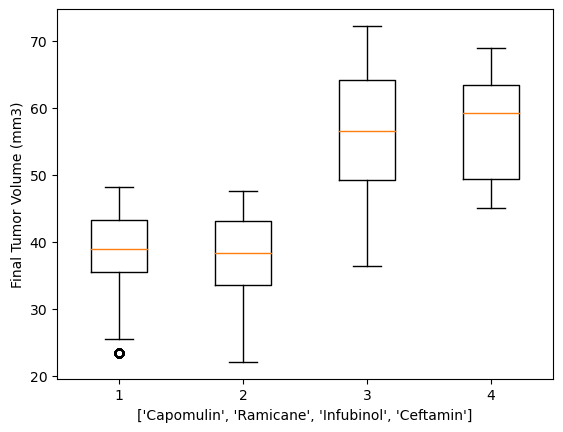

In [258]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel(four_treatments)
ax1.boxplot(new_list)
plt.show()



## Line and Scatter Plots

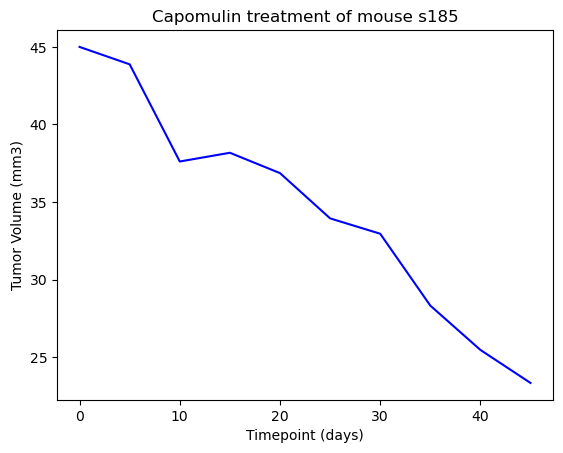

In [317]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# I need to isolate the four variables needed for the bar graph using a .loc method to create a new dataframe, then isolate
# the specific value I need from each row to list only one specific mouse.

four_column_df = new_df.loc[:, ["Mouse ID", "Tumor Volume (mm3)", "Timepoint", "Drug Regimen"]]


cap_df = four_column_df.loc[(four_column_df["Drug Regimen"] == "Capomulin")]


s185_df = cap_df.loc[(cap_df["Mouse ID"] == "s185")]
s185_df

s185_timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
s185_tumorvolume = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]


s185_df, = plt.plot(s185_timepoint, s185_tumorvolume, color="blue")
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



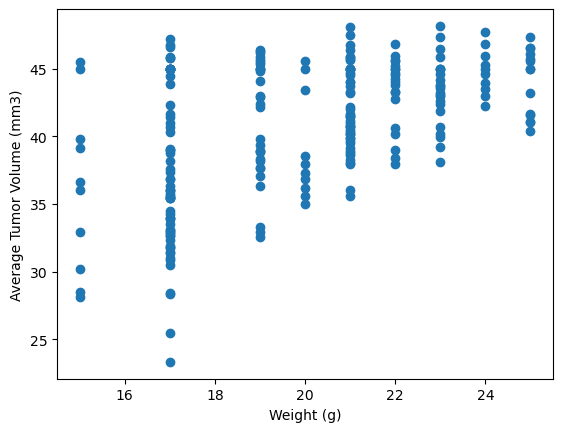

In [346]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_df = new_df.loc[:, ["Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
capomulin_df = scatter_df.loc[(scatter_df["Drug Regimen"] == "Capomulin")]

# plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
weight = capomulin_df['Weight (g)']
tumor_volume = capomulin_df['Tumor Volume (mm3)']
plt.scatter(weight,tumor_volume)
# # clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.53


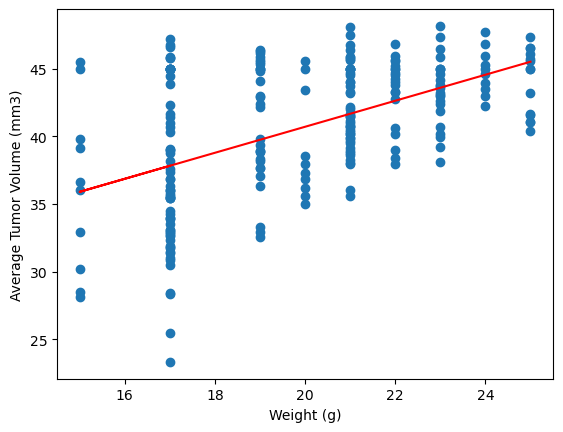

In [360]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# scatter_df = new_df.loc[:, ["Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
# capomulin_df = scatter_df.loc[(scatter_df["Drug Regimen"] == "Capomulin")]




weight = capomulin_df['Weight (g)']
tumor_volume = capomulin_df['Tumor Volume (mm3)']
plt.scatter(weight,tumor_volume)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


m, b = np.polyfit(weight, tumor_volume, 1)
plt.plot(weight, m*weight+b, color='red')

plt.show

correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumor_volume[0],2))}")
